(np.float64(-0.5), np.float64(566.5), np.float64(566.5), np.float64(-0.5))

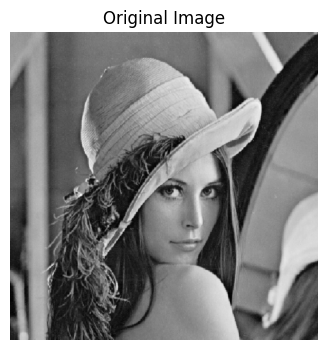

In [2]:
# --- Cell 1 ---
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Read the image from the uploaded file
img = np.array(Image.open('/content/Lena.png').convert('L'))  # Convert to grayscale

plt.figure(figsize=(4,4))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')



(np.float64(-0.5), np.float64(566.5), np.float64(566.5), np.float64(-0.5))

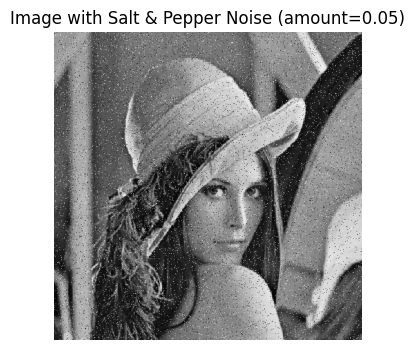

In [3]:
# --- Cell 2 ---
def add_salt_pepper_noise(image, amount=0.05):
    noisy = image.copy()
    total_pixels = image.size
    num_noisy = int(amount * total_pixels)

    # Select random coordinates
    coords = np.random.randint(0, image.shape[0], num_noisy), np.random.randint(0, image.shape[1], num_noisy)

    # Set half of them to 0 (pepper) and the other half to 255 (salt)
    half = num_noisy // 2
    noisy[coords[0][:half], coords[1][:half]] = 0
    noisy[coords[0][half:], coords[1][half:]] = 255
    return noisy

noisy_img = add_salt_pepper_noise(img, amount=0.05)

plt.figure(figsize=(4,4))
plt.title("Image with Salt & Pepper Noise (amount=0.05)")
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')


(np.float64(-0.5), np.float64(568.5), np.float64(568.5), np.float64(-0.5))

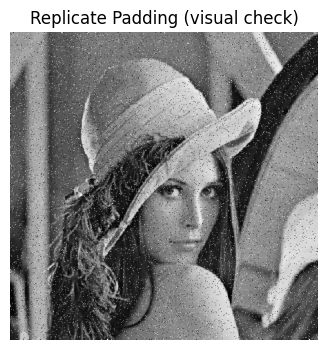

In [4]:
# --- Cell 3 ---
def replicate_pad(image, pad=1):
    padded = np.zeros((image.shape[0]+2*pad, image.shape[1]+2*pad), dtype=image.dtype)
    padded[pad:-pad, pad:-pad] = image

    # Top and bottom
    padded[:pad, pad:-pad] = image[0:1, :]
    padded[-pad:, pad:-pad] = image[-1:, :]

    # Left and right
    padded[:, :pad] = padded[:, pad:pad+1]
    padded[:, -pad:] = padded[:, -pad-1:-pad]

    return padded

padded_test = replicate_pad(noisy_img)
plt.figure(figsize=(4,4))
plt.title("Replicate Padding (visual check)")
plt.imshow(padded_test, cmap='gray')
plt.axis('off')


In [5]:
# --- سلول 4 ---
def median_filter(image, k=3):
    pad = k // 2
    padded = replicate_pad(image, pad)
    out = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+k, j:j+k].flatten()
            out[i,j] = np.median(window)
    return out

def min_filter(image, k=3):
    pad = k // 2
    padded = replicate_pad(image, pad)
    out = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+k, j:j+k].flatten()
            out[i,j] = np.min(window)
    return out

def max_filter(image, k=3):
    pad = k // 2
    padded = replicate_pad(image, pad)
    out = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+k, j:j+k].flatten()
            out[i,j] = np.max(window)
    return out


(np.float64(-0.5), np.float64(566.5), np.float64(566.5), np.float64(-0.5))

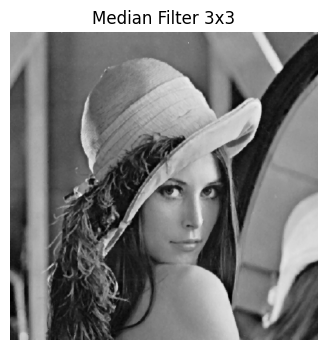

In [6]:
# --- Cell 5 ---
median_result = median_filter(noisy_img, k=3)
plt.figure(figsize=(4,4))
plt.title("Median Filter 3x3")
plt.imshow(median_result, cmap='gray')
plt.axis('off')


(np.float64(-0.5), np.float64(566.5), np.float64(566.5), np.float64(-0.5))

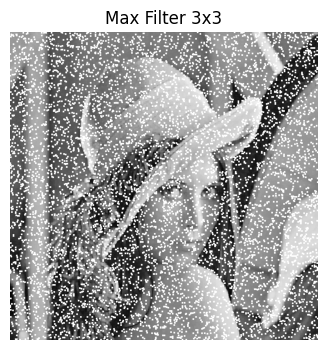

In [7]:
# --- Cell 6 ---
max_result = max_filter(noisy_img, k=3)
plt.figure(figsize=(4,4))
plt.title("Max Filter 3x3")
plt.imshow(max_result, cmap='gray')
plt.axis('off')


(np.float64(-0.5), np.float64(566.5), np.float64(566.5), np.float64(-0.5))

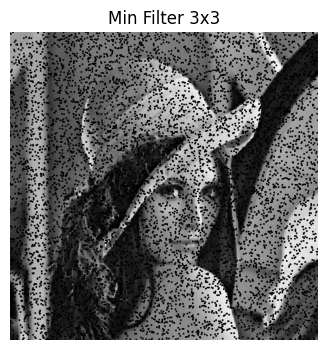

In [8]:
# --- Cell 7 ---
min_result = min_filter(noisy_img, k=3)
plt.figure(figsize=(4,4))
plt.title("Min Filter 3x3")
plt.imshow(min_result, cmap='gray')
plt.axis('off')


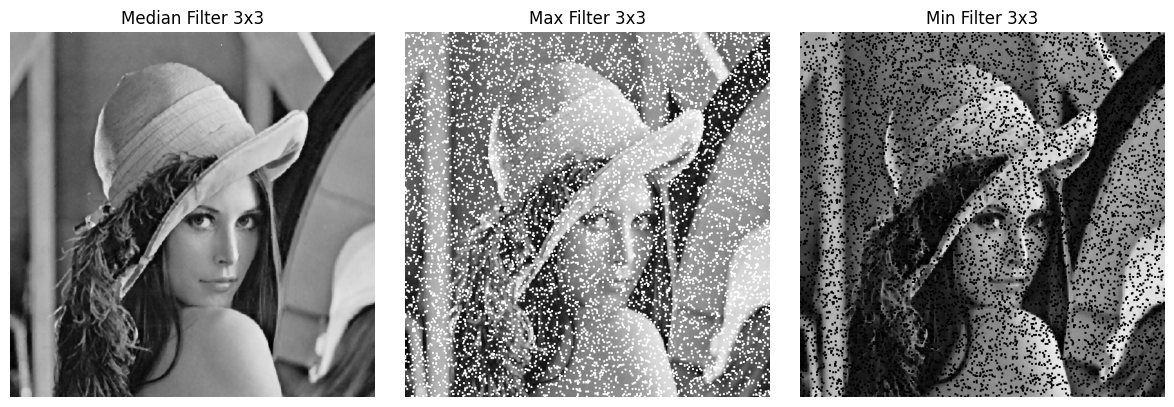

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Median Filter 3x3")
plt.imshow(median_result, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Max Filter 3x3")
plt.imshow(max_result, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Min Filter 3x3")
plt.imshow(min_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
